In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance"))
])

model.fit(Xtr, ytr)
yp = model.predict(Xte)
print("Test accuracy:", round(accuracy_score(yte, yp), 3))

ModuleNotFoundError: No module named 'sklearn'

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5, weights="distance"))
])

model.fit(Xtr, ytr)
yp = model.predict(Xte)
print("Test accuracy:", round(accuracy_score(yte, yp), 3))


Test accuracy: 0.947


In [2]:
import numpy as np
print("Train shape:", Xtr.shape, " Test shape:", Xte.shape)
unique, counts = np.unique(ytr, return_counts=True)
print("Train class balance:", dict(zip(unique, counts)))


Train shape: (112, 4)  Test shape: (38, 4)
Train class balance: {np.int64(0): np.int64(38), np.int64(1): np.int64(37), np.int64(2): np.int64(37)}


In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(yte, yp)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(yte, yp))

ImportError: ConfusionMatrixDisplay.plot requires matplotlib. You can install matplotlib with `pip install matplotlib`

In [4]:
import sys; print(sys.executable)  # shows which env your kernel uses
%pip install matplotlib



C:\Users\prati\anaconda3\envs\knn\python.exe
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 12.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.1 MB 12.1 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.1 MB 2.5 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 2.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.1 MB 2.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.0 MB/s eta 0:00:03
   ------------ --------------------------- 2.6/8.1 MB 2.0 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 1.8 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 1.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.4/8.1 MB 1.7 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.6 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



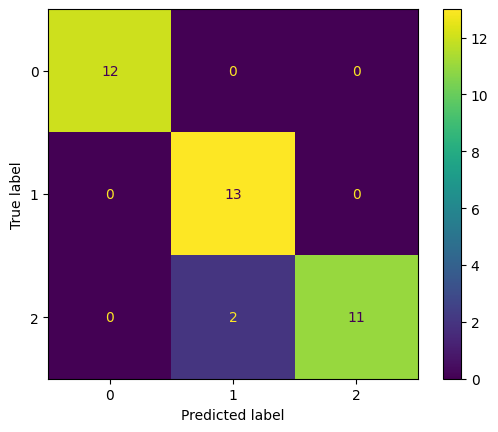

In [5]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(yte, yp)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(yte, yp))

Head:


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


None


Test Accuracy : 0.840
Precision     : 0.857
Recall        : 0.667
F1-score      : 0.750

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        64
           1       0.86      0.67      0.75        36

    accuracy                           0.84       100
   macro avg       0.85      0.80      0.82       100
weighted avg       0.84      0.84      0.83       100


Confusion matrix:
 [[60  4]
 [12 24]]


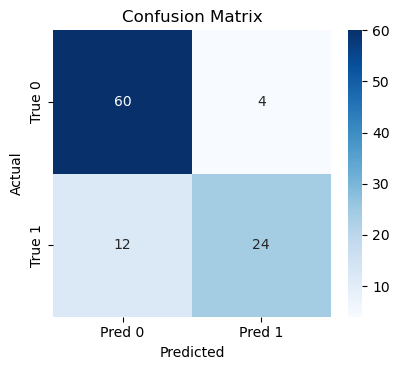

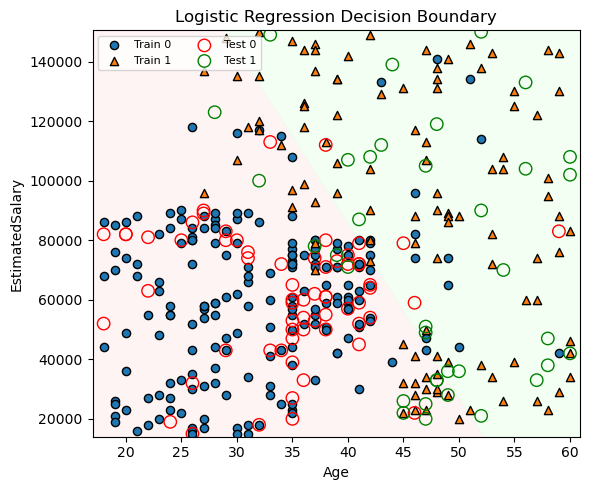

AUC: 0.910


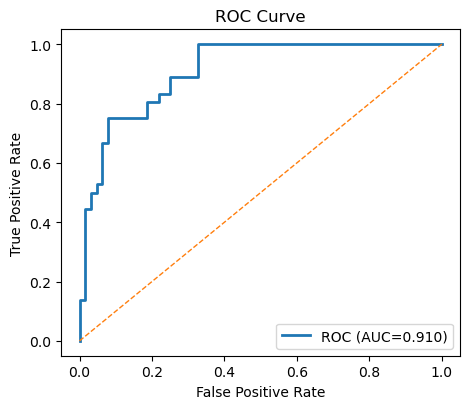

In [2]:
# 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score, classification_report
)

# 1) Load CSV & quick look  (Step 1)
#    Make sure 'Social_Network_Ads.csv' is in the current directory.
df = pd.read_csv("Social_Network_Ads.csv")
print("Head:")
display(df.head())
print("\nInfo:")
display(df.info())

# Typical columns in this dataset: ['User ID','Gender','Age','EstimatedSalary','Purchased']
# We'll use only the two numeric features the assignment expects for 2D visualization:
feature_cols = ['Age', 'EstimatedSalary']
target_col   = 'Purchased'

# 2) Extract X and y using iloc / column names (Step 2)
X = df[feature_cols].values
y = df[target_col].values.ravel()

# 3) Train / Test split (Step 3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4) Build classifier with scikit-learn LogisticRegression in a Pipeline (Step 4)
#    Standardize features -> Logistic Regression
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="liblinear", random_state=42))
])
clf.fit(X_train, y_train)

# 5) Predictions on the test set (Step 5)
y_pred = clf.predict(X_test)

# Metrics
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)

print(f"\nTest Accuracy : {acc:.3f}")
print(f"Precision     : {prec:.3f}")
print(f"Recall        : {rec:.3f}")
print(f"F1-score      : {f1:.3f}")
print("\nClassification report:")
print(classification_report(y_test, y_pred, zero_division=0))

# 6) Confusion matrix (Step 6)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

# 7) Confusion matrix heatmap with seaborn (Step 7)
plt.figure(figsize=(4.2, 3.8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 8) Decision boundary over the 2D feature space (Step 8)
#    We'll make a mesh on the ORIGINAL feature scales, then pass to the pipeline.
x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1  # Age
x2_min, x2_max = X[:,1].min() - 1000, X[:,1].max() + 1000  # Salary can be wide
h1 = 0.1     # step for Age
h2 = 500.0   # step for Salary (coarser to keep mesh reasonable)

xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, h1),
    np.arange(x2_min, x2_max, h2)
)

# Flatten, stack, and predict on the grid
grid = np.c_[xx1.ravel(), xx2.ravel()]
Z = clf.predict(grid)
Z = Z.reshape(xx1.shape)

plt.figure(figsize=(6, 5))
# Filled contour for classes
cmap_bg = ListedColormap(["#FFEEEE", "#EEFFEE"])
plt.contourf(xx1, xx2, Z, alpha=0.6, cmap=cmap_bg)

# Plot training and test points
# Training
idx0_tr = (y_train == 0)
idx1_tr = (y_train == 1)
plt.scatter(X_train[idx0_tr,0], X_train[idx0_tr,1], s=35, edgecolor='k', label="Train 0", marker='o')
plt.scatter(X_train[idx1_tr,0], X_train[idx1_tr,1], s=35, edgecolor='k', label="Train 1", marker='^')

# Test
idx0_te = (y_test == 0)
idx1_te = (y_test == 1)
plt.scatter(X_test[idx0_te,0], X_test[idx0_te,1], s=80, facecolors='none', edgecolor='red', label="Test 0")
plt.scatter(X_test[idx1_te,0], X_test[idx1_te,1], s=80, facecolors='none', edgecolor='green', label="Test 1")

plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.title("Logistic Regression Decision Boundary")
plt.legend(loc="upper left", fontsize=8, ncol=2)
plt.tight_layout()
plt.show()

# 9) ROC curve + AUC (Step 9)
#    Use predict_proba to get class-1 probabilities
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.3f}")

plt.figure(figsize=(4.8, 4.2))
plt.plot(fpr, tpr, lw=2, label=f"ROC (AUC={auc:.3f})")
plt.plot([0,1], [0,1], ls="--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()
